In [1]:
from larch.xafs import feffit, feffit_dataset, feffit_transform, feffit_report
from larch.xafs import pre_edge, autobk, xftf, xftr, ff2chi, feffpath
from larch.fitting import  param_group, param
from larch.io import h5group, read_ascii, read_athena, read_xdi, read_specfile, extract_athenagroup

import os
import copy
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[root] WARNING : Larchs apps and shell are not supported due to missing dependencies: cannot import name 'LarchWxApp' from 'larch.wxlib' (D:\Python\Anaconda3\envs\xraylarch\lib\site-packages\larch\wxlib\__init__.py)


In [2]:
""" 0. Preparing Data. """

data_dir = "data\\time_series"
fnames = [fname for fname in os.listdir(data_dir)]
path_list = [os.path.join(data_dir, fname) for fname in fnames]

In [16]:
""" 1. Batch Reading Data """

# Initialisation
data_list = [read_ascii(fpath, labels="energy mu") for fpath in path_list]
for data, fname in zip(data_list, fnames):
    data.groupname = fname
    
    data.norm = data.mu
# Pre-processing - EXAFS fittings only need a valid k space
    autobk(data, rbkg=1.18) # Need to have option to suppress normalisation in case loaded spectra is already normed
    xftf(data, kmin=3.0, kmax=10, dk=1.0, window="hanning", kweight=2.00)
    xftr(data, rmin=1.0, rmax=4.0, dr=1.0, window="hanning")

In [17]:
data

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
mu,ndarray
groupname,str
norm,ndarray


In [32]:
data.pre_edge_details.nnorm

2

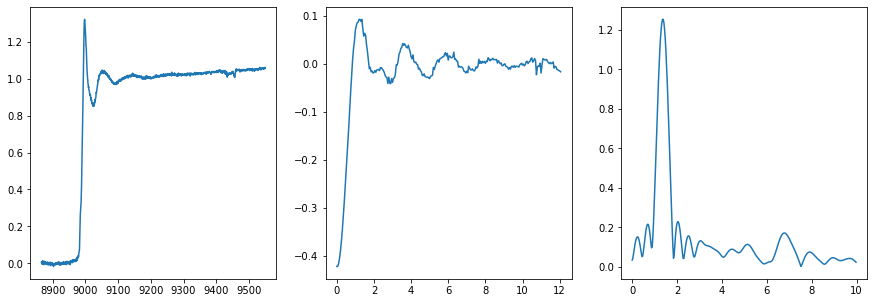

In [9]:
""" Misc: Plotting """
def plot(data_list, index):
    energy = data_list[index].energy
    mu = data_list[index].mu
    norm = data_list[index].norm
    chi = data_list[index].chi
    k = data_list[index].k
    chir_mag = data_list[index].chir_mag
    r = data_list[index].r

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].plot(energy, norm)
    ax[1].plot(k, chi)
    ax[2].plot(r, chir_mag)
    
plot(data_list, 0)

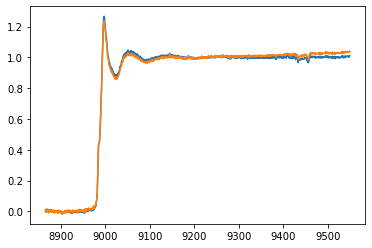

In [33]:
plt.plot(data.energy, data.mu)
plt.plot(data.energy, data.norm)